# Python Exploratory Data Analysis (EDA) on Broga Hill Park, Jalan Broga, Semenyih, Selangor

### Airbnb is an online marketplace that connects people who want to rent out their homes with people looking for accommodations in that locale. Broga,Semenyih is one of the most popular area in the Selangor,Malaysia, and one of the most popular vacation spot and business places globally.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the dataset

In [2]:
airbnb_df = pd.read_csv('Airbnb_cleanv1.csv',index_col=0) # drop the unnamed column
airbnb_df.head()

,Name,Header,Price_Per_Night,Superhost,Rating,Review,Rooms_info,Link,Area,Home_type,Guests,Bedrooms,Beds,Rooms_info2,Bathroom,Latitude,Longitude
0,"TTS Lake Villa @ Broga, Semenyih",Villa in Semenyih,1927.0,1,4.86,96.0,16+ guests 4 bedrooms 15 beds 3 baths,https://www.airbnb.com/rooms/52588088?adults=1...,Semenyih,Villa,16.0,4,15.0,16+ guests 4 bedrooms 15 beds 3 baths,3.0,2.947391,101.845991
1,"TTS Beach Village @ Broga, Semenyih",Villa in Semenyih,3138.0,1,5.00,15.0,16+ guests 5 bedrooms 22 beds 6 baths,https://www.airbnb.com/rooms/73086887394461725...,Semenyih,Villa,16.0,5,22.0,16+ guests 5 bedrooms 22 beds 6 baths,6.0,2.947391,101.845991
2,Mountain view villa with entertainment room,Villa in Semenyih,1716.0,0,4.60,15.0,16+ guests 6 bedrooms 6 beds 4 baths,https://www.airbnb.com/rooms/61284459437053711...,Semenyih,Villa,16.0,6,6.0,16+ guests 6 bedrooms 6 beds 4 baths,4.0,2.947391,101.845991
3,"Wabi Sabian Broga 侘寂の居, わび・さびのい organic farmstay",Cottage in Lenggeng,1145.0,0,4.86,22.0,8 guests 2 bedrooms 8 beds 5 baths,https://www.airbnb.com/rooms/60416724063512941...,Lenggeng,Cottage,8.0,2,8.0,8 guests 2 bedrooms 8 beds 5 baths,5.0,2.861427,101.943388
4,"Forest House Broga 森の居シンのい sh-in-no-i, Semenyih",Cottage in Lenggeng,1019.0,0,4.50,50.0,8 guests 2 bedrooms 8 beds 4.5 baths,https://www.airbnb.com/rooms/45835146?adults=1...,Lenggeng,Cottage,8.0,2,8.0,8 guests 2 bedrooms 8 beds 4.5 baths,4.5,2.861427,101.943388


In [3]:
airbnb_df.shape

(226, 17)

In [4]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 269
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             226 non-null    object 
 1   Header           226 non-null    object 
 2   Price_Per_Night  226 non-null    float64
 3   Superhost        226 non-null    int64  
 4   Rating           226 non-null    float64
 5   Review           226 non-null    float64
 6   Rooms_info       226 non-null    object 
 7   Link             226 non-null    object 
 8   Area             226 non-null    object 
 9   Home_type        226 non-null    object 
 10  Guests           226 non-null    float64
 11  Bedrooms         226 non-null    int64  
 12  Beds             226 non-null    float64
 13  Rooms_info2      226 non-null    object 
 14  Bathroom         226 non-null    float64
 15  Latitude         226 non-null    float64
 16  Longitude        226 non-null    float64
dtypes: float64(8), i

In [5]:
# Check the summany of the dataset
airbnb_df.describe()

,Price_Per_Night,Superhost,Rating,Review,Guests,Bedrooms,Beds,Bathroom,Latitude,Longitude
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,412.327434,0.442478,3.452168,38.345133,6.035398,2.230088,3.535398,1.991150,3.003647,101.768601
std,583.700371,0.497783,2.136656,56.416352,4.444081,1.723092,3.879414,1.561313,0.233469,0.136058
min,56.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.383453,101.106230
25%,116.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.914057,101.694237
50%,170.500000,0.000000,4.710000,13.000000,4.000000,2.000000,2.000000,1.500000,2.994844,101.789659
75%,463.000000,1.000000,4.880000,55.000000,8.000000,3.000000,4.000000,2.000000,3.151696,101.845991
max,3566.000000,1.000000,5.000000,324.000000,16.000000,15.000000,22.000000,14.000000,3.637141,102.210780


In [6]:
airbnb_df['Area'].unique()

array(['Semenyih', 'Lenggeng', 'Broga', 'Kuala Kubu Baru', 'Kajang',
       'Bangi', 'Nilai', 'Sungai Pelek', 'Seri Kembangan', 'Cyberjaya',
       'Sepang', 'Seremban', 'Hulu Langat', 'Genting Highlands',
       'Bandar Baru Bangi', 'Kuala Lumpur', 'Beranang', 'Bentong',
       'Tanjong Karang', 'Cheras', 'Port Dickson', 'Balakong', 'Mantin',
       'Petaling Jaya', 'Putrajaya', 'Ampang Jaya', 'Alor Gajah',
       'Telok Panglima Garang', 'Sekinchan', 'Dengkil', 'Janda Baik',
       'Batu Caves', 'Subang Jaya', 'Puchong', 'Shah Alam', 'Ampang',
       'Batang Berjuntai', 'Serendah', 'Pantai'], dtype=object)

In [7]:
airbnb_df['Home_type'].unique()

array(['Villa', 'Cottage', 'Home', 'Apartment', 'Bungalow', 'Condo',
       'Guesthouse', 'Vacation home', 'Tiny home', 'Private room',
       'Place to stay', 'Loft', 'Farm stay', 'Chalet', 'Treehouse',
       'Hotel room', 'Guest suite', 'Shipping container', 'Resort',
       'Cabin'], dtype=object)

In [8]:
# Checking column with missing values
airbnb_df.isnull().sum()

Name               0
Header             0
Price_Per_Night    0
Superhost          0
Rating             0
Review             0
Rooms_info         0
Link               0
Area               0
Home_type          0
Guests             0
Bedrooms           0
Beds               0
Rooms_info2        0
Bathroom           0
Latitude           0
Longitude          0
dtype: int64

In [9]:
# Remove redundant column
airbnb_df.drop(['Rooms_info2'],axis=1,inplace=True)
airbnb_df.head(5)

,Name,Header,Price_Per_Night,Superhost,Rating,Review,Rooms_info,Link,Area,Home_type,Guests,Bedrooms,Beds,Bathroom,Latitude,Longitude
0,"TTS Lake Villa @ Broga, Semenyih",Villa in Semenyih,1927.0,1,4.86,96.0,16+ guests 4 bedrooms 15 beds 3 baths,https://www.airbnb.com/rooms/52588088?adults=1...,Semenyih,Villa,16.0,4,15.0,3.0,2.947391,101.845991
1,"TTS Beach Village @ Broga, Semenyih",Villa in Semenyih,3138.0,1,5.00,15.0,16+ guests 5 bedrooms 22 beds 6 baths,https://www.airbnb.com/rooms/73086887394461725...,Semenyih,Villa,16.0,5,22.0,6.0,2.947391,101.845991
2,Mountain view villa with entertainment room,Villa in Semenyih,1716.0,0,4.60,15.0,16+ guests 6 bedrooms 6 beds 4 baths,https://www.airbnb.com/rooms/61284459437053711...,Semenyih,Villa,16.0,6,6.0,4.0,2.947391,101.845991
3,"Wabi Sabian Broga 侘寂の居, わび・さびのい organic farmstay",Cottage in Lenggeng,1145.0,0,4.86,22.0,8 guests 2 bedrooms 8 beds 5 baths,https://www.airbnb.com/rooms/60416724063512941...,Lenggeng,Cottage,8.0,2,8.0,5.0,2.861427,101.943388
4,"Forest House Broga 森の居シンのい sh-in-no-i, Semenyih",Cottage in Lenggeng,1019.0,0,4.50,50.0,8 guests 2 bedrooms 8 beds 4.5 baths,https://www.airbnb.com/rooms/45835146?adults=1...,Lenggeng,Cottage,8.0,2,8.0,4.5,2.861427,101.943388


# EDA

In [10]:
import folium
from geopy.geocoders import Nominatim
# create map of Tashkent using latitude and longitude values
address = "Kuala Lumpur, MY"
geolocator = Nominatim(user_agent="kl_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_kl = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district in zip(airbnb_df['Latitude'], airbnb_df['Longitude'], airbnb_df['Area']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_kl)  
    
map_kl

In [11]:
from folium.plugins import HeatMap
map_folium = folium.Map([3.1569,101.7123],zoom_start=11.4)
HeatMap(airbnb_df[['Latitude','Longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)

From the map above, we can see clearly where the densest listing is located, shown by the red color in the middle area of between Kuala Lumpur and Semenyih. The listing density increasingly declining the more it is farther away from the center area.

In [12]:
# Top 10 listings based on number of review
airbnb_df.nlargest(10,'Review')

,Name,Header,Price_Per_Night,Superhost,Rating,Review,Rooms_info,Link,Area,Home_type,Guests,Bedrooms,Beds,Bathroom,Latitude,Longitude
66,NOURI VILLA | A Tale of Two Rivers,Villa in Hulu Langat,2995.0,1,4.80,324.0,16+ guests 7 bedrooms 8 beds 8 baths,https://www.airbnb.com/rooms/24212397?adults=1...,Hulu Langat,Villa,16.0,7,8.0,8.0,3.083333,101.833333
92,Rest. Pause. Rainforest Retreat,Villa in Bentong,1186.0,1,4.88,272.0,16+ guests 4 bedrooms 7 beds 4 baths,https://www.airbnb.com/rooms/9437423?adults=1&...,Bentong,Villa,16.0,4,7.0,4.0,3.362471,102.017268
250,"#1 Summer Studio - Netflix , Wifi ( Sanitized )",Condo in Seri Kembangan,126.0,1,4.95,255.0,5 guests Studio 1 bed 1 bath,https://www.airbnb.com/rooms/23988065?adults=1...,Seri Kembangan,Condo,5.0,1,1.0,1.0,3.034065,101.705568
166,浪漫2人世界海景套房(角落)/ Romantic Seaview Studio (Corner),Apartment in Port Dickson,201.0,1,4.89,254.0,2 guests 1 bedroom 1 bed 1 bath,https://www.airbnb.com/rooms/22559930?adults=1...,Port Dickson,Apartment,2.0,1,1.0,1.0,2.522894,101.794513
16,Mountain View Getaway House with Pool (Lauhaus),Bungalow in Kuala Kubu Baru,525.0,1,4.76,200.0,6 guests 2 bedrooms 4 beds 1 bath,https://www.airbnb.com/rooms/47368814?adults=1...,Kuala Kubu Baru,Bungalow,6.0,2,4.0,1.0,3.637141,101.573005
79,Plateau Farm Sustainable Treehouse Camp@Janda ...,Treehouse in Bentong,262.0,1,4.84,200.0,2 guests 1 bedroom 1 bed 1 bath,https://www.airbnb.com/rooms/36957885?adults=1...,Bentong,Treehouse,2.0,1,1.0,1.0,3.362471,102.017268
13,Hillside Batu Retreat @ Kuala Kubu Bharu Heights,Villa in Kuala Kubu Baru,898.0,1,4.88,199.0,10 guests 3 bedrooms 8 beds 3 baths,https://www.airbnb.com/rooms/41756823?adults=1...,Kuala Kubu Baru,Villa,10.0,3,8.0,3.0,3.637141,101.573005
143,"Pulaithree retreat, Kuala Kubu Bharu Heights",Cottage in Kuala Kubu Baru,1118.0,0,4.77,192.0,7 guests 2 bedrooms 6 beds 2 baths,https://www.airbnb.com/rooms/38299410?adults=1...,Kuala Kubu Baru,Cottage,7.0,2,6.0,2.0,3.637141,101.573005
47,"Windmill 2BR, Free Parking Genting View",Condo in Genting Highlands,157.0,0,4.81,186.0,6 guests 2 bedrooms 2 beds 2 baths,https://www.airbnb.com/rooms/45692920?adults=1...,Genting Highlands,Condo,6.0,2,2.0,2.0,3.423773,101.793559
112,1#Menara Simfoni@Balakong*STUDIO*Aeon*D Mines/...,Condo in Cheras,102.0,1,4.82,173.0,3 guests Studio 1 bed 1 bath,https://www.airbnb.com/rooms/42290853?adults=1...,Cheras,Condo,3.0,1,1.0,1.0,3.099192,101.737423


In [13]:
# The sum of review in the area
# Get the area and review count data
area_review_data = airbnb_df.groupby('Area')['Review'].sum().sort_values(ascending=False)
area_review_data 


Area
Port Dickson             872.0
Bentong                  857.0
Semenyih                 846.0
Genting Highlands        750.0
Kuala Kubu Baru          601.0
Kajang                   560.0
Seri Kembangan           535.0
Hulu Langat              441.0
Nilai                    428.0
Bandar Baru Bangi        366.0
Cyberjaya                352.0
Cheras                   332.0
Balakong                 202.0
Putrajaya                194.0
Ampang                   110.0
Seremban                 108.0
Kuala Lumpur             107.0
Alor Gajah               100.0
Bangi                     97.0
Puchong                   96.0
Beranang                  95.0
Telok Panglima Garang     83.0
Lenggeng                  77.0
Sepang                    77.0
Shah Alam                 73.0
Sungai Pelek              59.0
Janda Baik                53.0
Mantin                    51.0
Broga                     44.0
Dengkil                   41.0
Sekinchan                 32.0
Serendah                  13.0
Pet

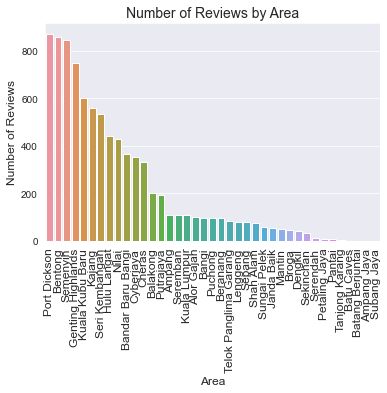

In [14]:
#  Plot the data as a bar plot
sns.set_style('darkgrid')
sns.barplot(x=area_review_data.index, y=area_review_data.values)

plt.xlabel('Area', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title('Number of Reviews by Area', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.show()


#### Type of home

<AxesSubplot:xlabel='Home_type', ylabel='Area'>

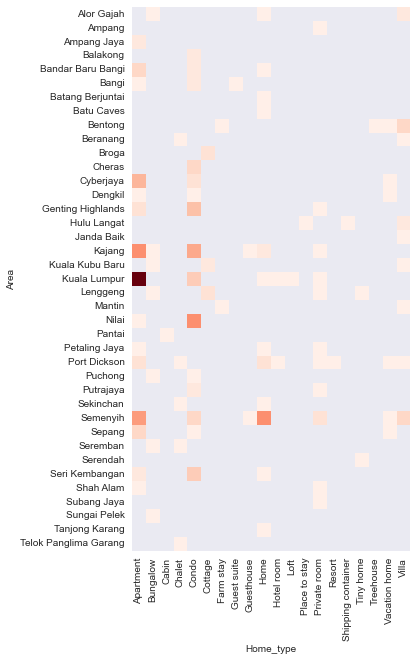

In [15]:
# Airbnb home type based on Area in this dataset
airbnb_home_type = airbnb_df.groupby(['Area','Home_type']).size().reset_index(name='counts')

airbnb_home_type = airbnb_home_type.pivot(index='Area',columns='Home_type', values='counts')
airbnb_home_type 
#Visualize using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data=airbnb_home_type ,square=True, vmin=0, cmap='Reds',cbar=False)


#### How do prices of listings vary by location?


In [16]:
# Average price of property according to area
avg_price = airbnb_df.groupby(['Area','Home_type'], as_index=False)['Price_Per_Night'].mean().rename(columns={'Price_Per_Night':'Average_Price'})
avg_price

,Area,Home_type,Average_Price
0,Alor Gajah,Bungalow,966.0
1,Alor Gajah,Home,785.0
2,Alor Gajah,Villa,714.0
3,Ampang,Private room,194.0
4,Ampang Jaya,Apartment,118.5
...,...,...,...
93,Shah Alam,Private room,185.0
94,Subang Jaya,Private room,86.0
95,Sungai Pelek,Bungalow,525.0
96,Tanjong Karang,Home,872.0


In [17]:
# Unstack the group by information for plot the graph
avg_price = airbnb_df.groupby(['Area','Home_type'])['Price_Per_Night'].mean().unstack()
avg_price = avg_price.fillna(0,axis=1)
avg_price

Home_type,Apartment,Bungalow,Cabin,Chalet,Condo,Cottage,Farm stay,Guest suite,Guesthouse,Home,Hotel room,Loft,Place to stay,Private room,Resort,Shipping container,Tiny home,Treehouse,Vacation home,Villa
Area,,,,,,,,,,,,,,,,,,,,
Alor Gajah,0.000000,966.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,785.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,714.00
Ampang,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.000000,0.0,0.0,0.0,0.0,0.0,0.00
Ampang Jaya,118.500000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00
Balakong,0.000000,0.0,0.0,0.0,117.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00
Bandar Baru Bangi,123.000000,0.0,0.0,0.0,115.000000,0.000000,0.0,0.0,0.0,803.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00
Bangi,97.000000,0.0,0.0,0.0,121.500000,0.000000,0.0,185.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00
Batang Berjuntai,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,302.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00
Batu Caves,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00
Bentong,0.000000,0.0,0.0,0.0,0.000000,0.000000,3266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,262.0,1860.0,1680.75


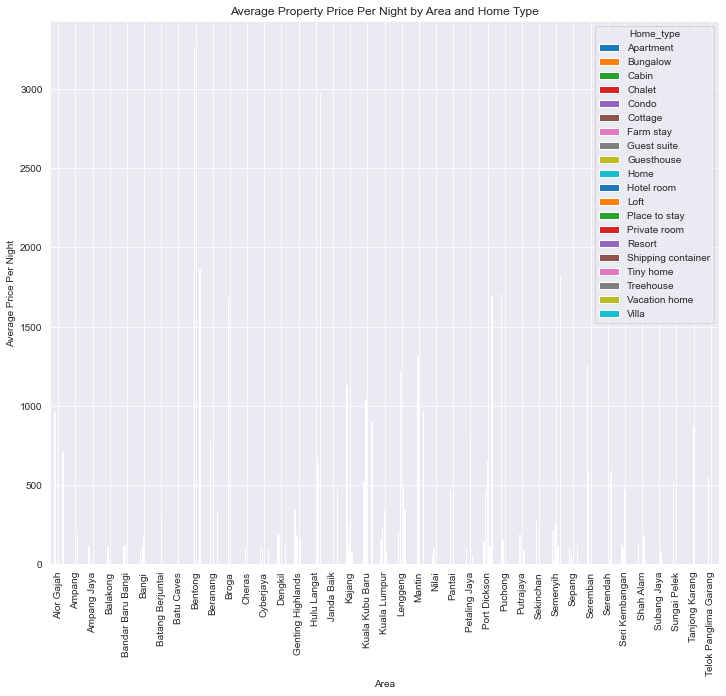

In [18]:
# Graph of average price of Home_type according to area
avg_price.plot(kind='bar', figsize=(12, 10))
plt.xlabel('Area')
plt.ylabel('Average Price Per Night')
plt.title('Average Property Price Per Night by Area and Home Type')
plt.show()


In [19]:
# Get the highest rent per night according to area
max_price = airbnb_df.groupby(['Area'],as_index=False)['Price_Per_Night'].max().sort_values(['Price_Per_Night'],ascending=False).rename(columns={'Price_Per_Night':'Max_Price'})
max_price

,Area,Max_Price
8,Bentong,3566.0
29,Semenyih,3138.0
15,Hulu Langat,2995.0
10,Broga,2054.0
26,Puchong,1712.0
25,Port Dickson,1690.0
20,Lenggeng,1522.0
21,Mantin,1315.0
31,Seremban,1255.0
17,Kajang,1232.0


In [20]:
# Get the lowest rent according to area
min_price = airbnb_df.groupby(['Area'],as_index=False)['Price_Per_Night'].min().sort_values(['Price_Per_Night'],ascending=True).rename(columns={'Price_Per_Night':'Min_Price'})
min_price

,Area,Min_Price
19,Kuala Lumpur,56.0
24,Petaling Jaya,64.0
22,Nilai,64.0
29,Semenyih,64.0
30,Sepang,67.0
14,Genting Highlands,68.0
17,Kajang,79.0
35,Subang Jaya,86.0
12,Cyberjaya,86.0
33,Seri Kembangan,88.0


In [21]:
# Combine dataframe of minimum and maximum price per night according to area
merge_price_df = pd.merge(max_price,min_price, on='Area')
merge_price_df

,Area,Max_Price,Min_Price
0,Bentong,3566.0,262.0
1,Semenyih,3138.0,64.0
2,Hulu Langat,2995.0,629.0
3,Broga,2054.0,1096.0
4,Puchong,1712.0,151.0
5,Port Dickson,1690.0,97.0
6,Lenggeng,1522.0,217.0
7,Mantin,1315.0,971.0
8,Seremban,1255.0,582.0
9,Kajang,1232.0,79.0


Text(0.5, 1.0, 'Maximum and minimum price according to area')

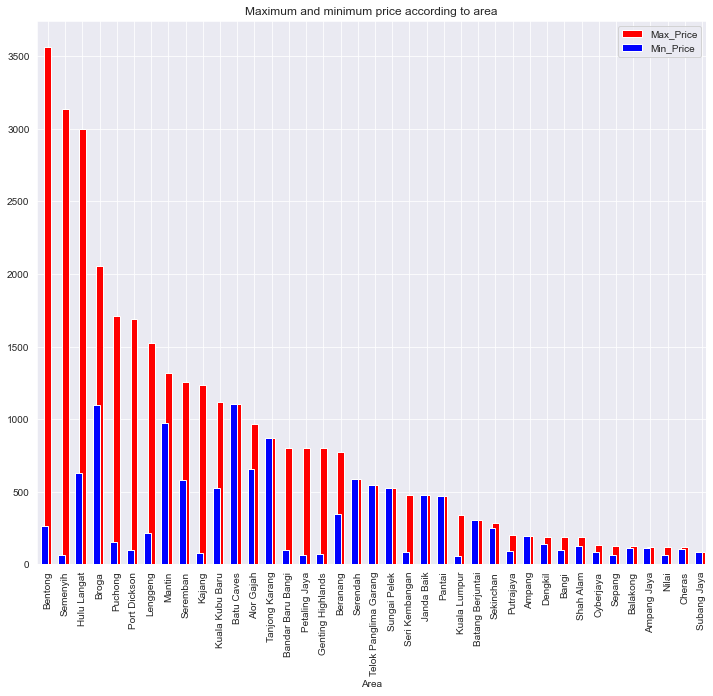

In [22]:
# Plot bat graph to display to max price and min price according to area
fig, ax = plt.subplots(figsize=(12,10))
merge_price_df.plot(kind='bar', x='Area', y='Max_Price', color='red', ax=ax, width=0.4)
merge_price_df.plot(kind='bar', x='Area', y='Min_Price', color='blue', ax=ax, width=0.4, position=1)
ax.legend(['Max_Price','Min_Price'])
ax.set_title('Maximum and minimum price according to area')

#### How does price listings vary from room_infos?

Text(0.5, 0, 'Price in (RM)')

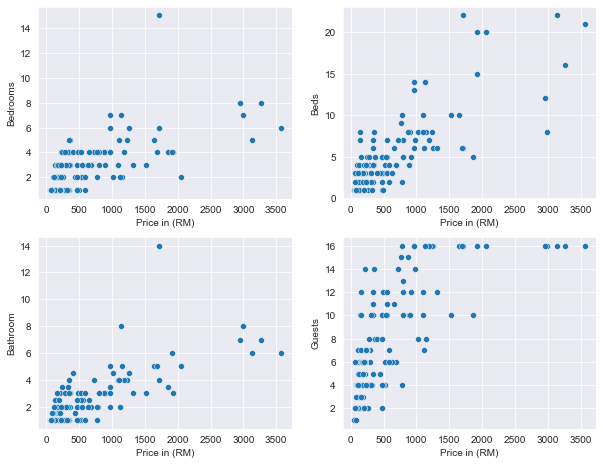

In [23]:
#visualize the relationship using scatterplot

plt.figure(figsize=(10,12))

# Number of Bedrooms
plt.subplot(3,2,1)
sns.scatterplot(data=airbnb_df, x='Price_Per_Night', y='Bedrooms')
plt.xlabel('Price in (RM)')

# Number of Beds
plt.subplot(3,2,2)
sns.scatterplot(data=airbnb_df, x='Price_Per_Night', y='Beds')
plt.xlabel('Price in (RM)')

# Number of Bathroom
plt.subplot(3,2,3)
sns.scatterplot(data=airbnb_df, x='Price_Per_Night', y='Bathroom')
plt.xlabel('Price in (RM)')

# Number of Guests
plt.subplot(3,2,4)
sns.scatterplot(data=airbnb_df, x='Price_Per_Night', y='Guests')
plt.xlabel('Price in (RM)')





#### What are the rating and review in the area? Do they vary by area?

In [24]:
#Get the Name & Area based on number of reviews
name_area_based_on_reviews = airbnb_df.groupby(['Name','Area'],as_index=False)['Review'].sum().sort_values(['Review'],ascending=False)
name_area_based_on_reviews

,Name,Area,Review
142,NOURI VILLA | A Tale of Two Rivers,Hulu Langat,324.0
158,Rest. Pause. Rainforest Retreat,Bentong,272.0
1,"#1 Summer Studio - Netflix , Wifi ( Sanitized )",Seri Kembangan,255.0
223,浪漫2人世界海景套房(角落)/ Romantic Seaview Studio (Corner),Port Dickson,254.0
151,Plateau Farm Sustainable Treehouse Camp@Janda ...,Bentong,200.0
...,...,...,...
150,PJ13 100MbpsSweetStay3Pax ByHapyhome@PJCentres...,Petaling Jaya,0.0
145,Nicely 2BR Suite @ Arte Plus Ampang,Kuala Lumpur,0.0
73,DCeria Andorra-Maeps-Putrajaya,Seri Kembangan,0.0
76,Dilla Homestay @ Bangi-UKM-Kajang Muslim Only,Kajang,0.0


In [25]:
#Get the Name & Area based on number of Rating
name_area_based_on_ratings = airbnb_df.groupby(['Name','Area'],as_index=False)['Rating'].sum().sort_values(['Rating'],ascending=False)
name_area_based_on_ratings

,Name,Area,Rating
162,Rumah Hitam Puteh + Private Swimming Pool,Kajang,5.0
202,UCSI/Cozy/Greenery HillTop New Condo@Cheras KL,Kuala Lumpur,5.0
159,Rest@1bedroom@Arte Mont Kiara,Kuala Lumpur,5.0
164,SAZ GUESTHOUSE - Pool View (A19),Semenyih,5.0
166,SAZ GUESTHOUSE - Pool View (A22),Semenyih,5.0
...,...,...,...
73,DCeria Andorra-Maeps-Putrajaya,Seri Kembangan,0.0
150,PJ13 100MbpsSweetStay3Pax ByHapyhome@PJCentres...,Petaling Jaya,0.0
145,Nicely 2BR Suite @ Arte Plus Ampang,Kuala Lumpur,0.0
76,Dilla Homestay @ Bangi-UKM-Kajang Muslim Only,Kajang,0.0


In [26]:
# Merge two dataframe based on number of reviews and ratings
popular_area_df = pd.merge(name_area_based_on_reviews, name_area_based_on_ratings, on=['Name','Area'])
popular_area_df

,Name,Area,Review,Rating
0,NOURI VILLA | A Tale of Two Rivers,Hulu Langat,324.0,4.80
1,Rest. Pause. Rainforest Retreat,Bentong,272.0,4.88
2,"#1 Summer Studio - Netflix , Wifi ( Sanitized )",Seri Kembangan,255.0,4.95
3,浪漫2人世界海景套房(角落)/ Romantic Seaview Studio (Corner),Port Dickson,254.0,4.89
4,Plateau Farm Sustainable Treehouse Camp@Janda ...,Bentong,200.0,4.84
...,...,...,...,...
221,PJ13 100MbpsSweetStay3Pax ByHapyhome@PJCentres...,Petaling Jaya,0.0,0.00
222,Nicely 2BR Suite @ Arte Plus Ampang,Kuala Lumpur,0.0,0.00
223,DCeria Andorra-Maeps-Putrajaya,Seri Kembangan,0.0,0.00
224,Dilla Homestay @ Bangi-UKM-Kajang Muslim Only,Kajang,0.0,0.00


In [27]:
# Top 10 Popular Area Airbnb Name list in the dataset Based on Reviews and Ratings
popular_area_df = popular_area_df.sort_values(by=['Review', 'Rating'], ascending=False).head(10)
popular_area_df

,Name,Area,Review,Rating
0,NOURI VILLA | A Tale of Two Rivers,Hulu Langat,324.0,4.80
1,Rest. Pause. Rainforest Retreat,Bentong,272.0,4.88
2,"#1 Summer Studio - Netflix , Wifi ( Sanitized )",Seri Kembangan,255.0,4.95
3,浪漫2人世界海景套房(角落)/ Romantic Seaview Studio (Corner),Port Dickson,254.0,4.89
4,Plateau Farm Sustainable Treehouse Camp@Janda ...,Bentong,200.0,4.84
5,Mountain View Getaway House with Pool (Lauhaus),Kuala Kubu Baru,200.0,4.76
6,Hillside Batu Retreat @ Kuala Kubu Bharu Heights,Kuala Kubu Baru,199.0,4.88
7,"Pulaithree retreat, Kuala Kubu Bharu Heights",Kuala Kubu Baru,192.0,4.77
8,"Windmill 2BR, Free Parking Genting View",Genting Highlands,186.0,4.81
9,1#Menara Simfoni@Balakong*STUDIO*Aeon*D Mines/...,Cheras,173.0,4.82


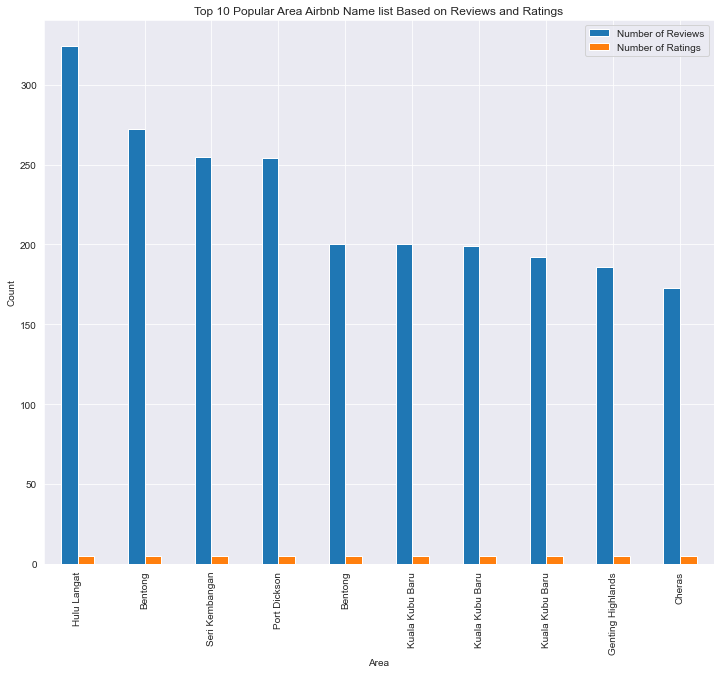

In [28]:
# Plot bar graph
popular_area_df.plot(kind='bar', x='Area', y=['Review', 'Rating'], figsize=(12, 10))
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Top 10 Popular Area Airbnb Name list Based on Reviews and Ratings')
plt.legend(['Number of Reviews', 'Number of Ratings'])
plt.show()

#### What are the different types of properties in the area? Do they vary by area?

In [29]:
#Get the Name & Area based  on Home_type
name_area_based_on_hometype = airbnb_df.groupby(['Name','Area'],as_index=False)['Home_type'].sum().sort_values(['Home_type'],ascending=False)
name_area_based_on_hometype

,Name,Area,Home_type
113,IKAN Residence | Hidden Gem Villa with Forest ...,Bentong,Villa
105,Hillside Batu Retreat @ Kuala Kubu Bharu Heights,Kuala Kubu Baru,Villa
31,8-12px Karaoke/BBQ/Family Gathering/Photoshoot,Semenyih,Villa
42,Aurora Home with Private Pool,Port Dickson,Villa
204,V5 Garden Home Pool Villa at A'Famosa,Alor Gajah,Villa
...,...,...,...
174,Spacious 1 bedroom @ Nearby KLCC,Kuala Lumpur,Apartment
101,HB1713 | 2 Bedroom Sanitised Netflix Wifi Parking,Cyberjaya,Apartment
102,Hana Home Wi-Fi Midhills Genting,Genting Highlands,Apartment
104,High Floor @ Evo Bangi FREE Parking/ Pool/ Net...,Bandar Baru Bangi,Apartment


In [30]:
# Get the Name & Area based on Superhost
name_area_based_on_Superhost = airbnb_df.groupby(['Name','Area'],as_index=False)['Superhost'].sum().sort_values(['Superhost'],ascending=False)
name_area_based_on_Superhost

,Name,Area,Superhost
113,IKAN Residence | Hidden Gem Villa with Forest ...,Bentong,1
126,Landmark 2.2: Queen size bed; Netflix & Parking,Kajang,1
110,HorizonSuites@Glorybnb #KLIA Netflix Cozy Desi...,Sepang,1
1,"#1 Summer Studio - Netflix , Wifi ( Sanitized )",Seri Kembangan,1
114,Industrial Wood Black House With Pool & Tree H...,Kajang,1
...,...,...,...
124,Laman Jubilee DBayu,Mantin,0
46,BROGA BLISS ECO GARDEN - Gems Private Unit,Broga,0
122,Kiara Plaza | Netflix | Semenyih | Broga | Kajang,Semenyih,0
121,Kepyok (1),Beranang,0


In [31]:
# Merge the Superhost dataframe and Home_type dataframe with popular_area_df
popular_area_df2 = pd.merge(popular_area_df, name_area_based_on_hometype, on=['Name','Area'])
popular_area_df3 = pd.merge(popular_area_df2, name_area_based_on_Superhost, on=['Name','Area'])
popular_area_df3

,Name,Area,Review,Rating,Home_type,Superhost
0,NOURI VILLA | A Tale of Two Rivers,Hulu Langat,324.0,4.80,Villa,1
1,Rest. Pause. Rainforest Retreat,Bentong,272.0,4.88,Villa,1
2,"#1 Summer Studio - Netflix , Wifi ( Sanitized )",Seri Kembangan,255.0,4.95,Condo,1
3,浪漫2人世界海景套房(角落)/ Romantic Seaview Studio (Corner),Port Dickson,254.0,4.89,Apartment,1
4,Plateau Farm Sustainable Treehouse Camp@Janda ...,Bentong,200.0,4.84,Treehouse,1
5,Mountain View Getaway House with Pool (Lauhaus),Kuala Kubu Baru,200.0,4.76,Bungalow,1
6,Hillside Batu Retreat @ Kuala Kubu Bharu Heights,Kuala Kubu Baru,199.0,4.88,Villa,1
7,"Pulaithree retreat, Kuala Kubu Bharu Heights",Kuala Kubu Baru,192.0,4.77,Cottage,0
8,"Windmill 2BR, Free Parking Genting View",Genting Highlands,186.0,4.81,Condo,0
9,1#Menara Simfoni@Balakong*STUDIO*Aeon*D Mines/...,Cheras,173.0,4.82,Condo,1


In [32]:
top_10_areas = popular_area_df3.sort_values(by=['Review', 'Rating', 'Home_type', 'Superhost'], ascending=False).head(10)
top_10_areas

,Name,Area,Review,Rating,Home_type,Superhost
0,NOURI VILLA | A Tale of Two Rivers,Hulu Langat,324.0,4.80,Villa,1
1,Rest. Pause. Rainforest Retreat,Bentong,272.0,4.88,Villa,1
2,"#1 Summer Studio - Netflix , Wifi ( Sanitized )",Seri Kembangan,255.0,4.95,Condo,1
3,浪漫2人世界海景套房(角落)/ Romantic Seaview Studio (Corner),Port Dickson,254.0,4.89,Apartment,1
4,Plateau Farm Sustainable Treehouse Camp@Janda ...,Bentong,200.0,4.84,Treehouse,1
5,Mountain View Getaway House with Pool (Lauhaus),Kuala Kubu Baru,200.0,4.76,Bungalow,1
6,Hillside Batu Retreat @ Kuala Kubu Bharu Heights,Kuala Kubu Baru,199.0,4.88,Villa,1
7,"Pulaithree retreat, Kuala Kubu Bharu Heights",Kuala Kubu Baru,192.0,4.77,Cottage,0
8,"Windmill 2BR, Free Parking Genting View",Genting Highlands,186.0,4.81,Condo,0
9,1#Menara Simfoni@Balakong*STUDIO*Aeon*D Mines/...,Cheras,173.0,4.82,Condo,1


#### What are the type listings are there in Broga,Lenggeng and Semenyih?

In [33]:
# Combine the area of Semenyih, Broga and Lenggeng Airbnb listings sort by price per night 
area_df = airbnb_df[(airbnb_df['Area'] == 'Semenyih') | (airbnb_df['Area'] == 'Broga') | (airbnb_df['Area'] == 'Lenggeng')]
sorted_df = area_df.sort_values(['Price_Per_Night'])
sorted_df

,Name,Header,Price_Per_Night,Superhost,Rating,Review,Rooms_info,Link,Area,Home_type,Guests,Bedrooms,Beds,Bathroom,Latitude,Longitude
36,Apartment with cat boarding,Private room in Semenyih,64.0,0,0.00,0.0,1 guest 1 bedroom 1 bed Shared half-bath,https://www.airbnb.com/rooms/73526870059278836...,Semenyih,Private room,1.0,1,1.0,1.0,2.947391,101.845991
212,Cosy middle room with green lush,Private room in Semenyih,72.0,0,0.00,0.0,2 guests 1 bedroom 1 bed 1 private bath,https://www.airbnb.com/rooms/78065622973413417...,Semenyih,Private room,2.0,1,1.0,1.0,2.947391,101.845991
15,1-2pax Stay@Kajang|Semenyih FREE Wifi/Car Park,Apartment in Semenyih,98.0,0,4.64,42.0,2 guests 1 bedroom 1 bed 1 bath,https://www.airbnb.com/rooms/40567677?adults=1...,Semenyih,Apartment,2.0,1,1.0,1.0,2.947391,101.845991
11,Melody 3-bedroom residential home,Home in Semenyih,134.0,0,4.56,18.0,6 guests 3 bedrooms 4 beds 2 baths,https://www.airbnb.com/rooms/54216451?adults=1...,Semenyih,Home,6.0,3,4.0,2.0,2.947391,101.845991
7,"Ascotte Boulevard 96 喜乐民宿 Semenyih,Selangor.",Apartment in Semenyih,137.0,0,4.74,116.0,7 guests 3 bedrooms 8 beds 2.5 baths,https://www.airbnb.com/rooms/22178469?adults=1...,Semenyih,Apartment,7.0,3,8.0,2.5,2.947391,101.845991
68,Homestay Residensi Aman\nCasa De' Aman 7-13,Condo in Semenyih,194.0,0,4.60,5.0,6 guests 3 bedrooms 3 beds 2 baths,https://www.airbnb.com/rooms/71006246382996738...,Semenyih,Condo,6.0,3,3.0,2.0,2.947391,101.845991
37,Flex Home by ABHOME,Apartment in Semenyih,195.0,0,4.00,3.0,6 guests 3 bedrooms 3 beds 2 baths,https://www.airbnb.com/rooms/53319107?adults=1...,Semenyih,Apartment,6.0,3,3.0,2.0,2.947391,101.845991
12,D'Cerrum Serumpun Semenyih Ecohill Banang Kajang,Apartment in Semenyih,197.0,1,4.85,27.0,6 guests 3 bedrooms 4 beds 2 baths,https://www.airbnb.com/rooms/34481669?adults=1...,Semenyih,Apartment,6.0,3,4.0,2.0,2.947391,101.845991
115,Naurah Homestay,Apartment in Semenyih,206.0,0,4.33,6.0,6 guests 3 bedrooms 4 beds 2 baths,https://www.airbnb.com/rooms/67866341866480208...,Semenyih,Apartment,6.0,3,4.0,2.0,2.947391,101.845991
266,Jiaxin Homestay Semenyih Broga Kajang Selangor,Private room in Semenyih,207.0,0,0.00,0.0,2 guests 1 bedroom 1 bed 1.5 baths,https://www.airbnb.com/rooms/34833256?adults=1...,Semenyih,Private room,2.0,1,1.0,1.5,2.947391,101.845991


<AxesSubplot:xlabel='Area', ylabel='Price_Per_Night'>

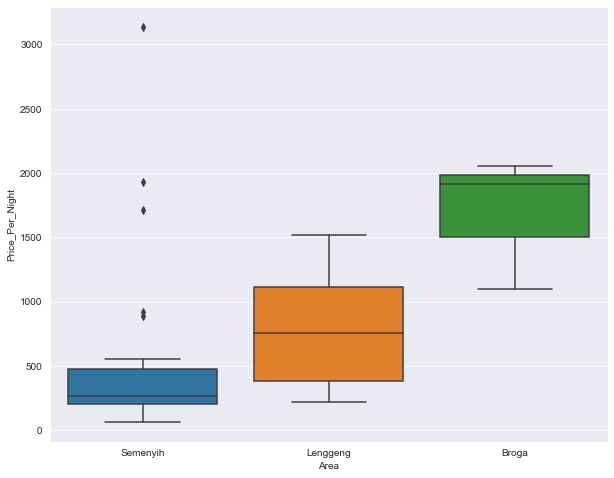

In [34]:
# Plot boxplot to observe the distribution price on this particular areas
plt.figure(figsize=(10,8))
sns.boxplot(x ='Area', y='Price_Per_Night',data = sorted_df[sorted_df['Price_Per_Night']<3200])

- We can state that Broga has the highest range price for the listings with about RM1900 as an average price, followed by Lenggeng with RM790 per night as an average price,
- Semenyih area is the cheapest and the most expensive.

In [35]:
type_listings = sorted_df.groupby(['Name','Area'],as_index=False)['Home_type'].sum()
type_listings

,Name,Area,Home_type
0,(NEW) Broga-Semenyih 5R3B Luxury Homestay中文房东,Semenyih,Home
1,1-2pax Stay@Kajang|Semenyih FREE Wifi/Car Park,Semenyih,Apartment
2,8-12px Karaoke/BBQ/Family Gathering/Photoshoot,Semenyih,Villa
3,Anjung Serene + Private Pool (10 pax) @ Semenyih,Semenyih,Home
4,Apartment with cat boarding,Semenyih,Private room
5,"Ascotte Boulevard 96 喜乐民宿 Semenyih,Selangor.",Semenyih,Apartment
6,BROGA BLISS ECO GARDEN - Crystal Private Unit,Broga,Cottage
7,BROGA BLISS ECO GARDEN - Gems Private Unit,Broga,Cottage
8,BROGA BLISS ECO GARDEN - Pearl Private Unit,Broga,Cottage
9,Begonia's site,Semenyih,Home


In [36]:
print(sorted_df.columns)

Index(['Name', 'Header', 'Price_Per_Night', 'Superhost', 'Rating', 'Review',
       'Rooms_info', 'Link', 'Area', 'Home_type', 'Guests', 'Bedrooms', 'Beds',
       'Bathroom', 'Latitude', 'Longitude'],
      dtype='object')


In [37]:
type_listings = sorted_df.groupby(['Name','Area'],as_index=False)['Home_type'].value_counts()
type_listings

,Name,Area,Home_type,count
0,(NEW) Broga-Semenyih 5R3B Luxury Homestay中文房东,Semenyih,Home,1
1,1-2pax Stay@Kajang|Semenyih FREE Wifi/Car Park,Semenyih,Apartment,1
2,8-12px Karaoke/BBQ/Family Gathering/Photoshoot,Semenyih,Villa,1
3,Anjung Serene + Private Pool (10 pax) @ Semenyih,Semenyih,Home,1
4,Apartment with cat boarding,Semenyih,Private room,1
5,"Ascotte Boulevard 96 喜乐民宿 Semenyih,Selangor.",Semenyih,Apartment,1
6,BROGA BLISS ECO GARDEN - Crystal Private Unit,Broga,Cottage,1
7,BROGA BLISS ECO GARDEN - Gems Private Unit,Broga,Cottage,1
8,BROGA BLISS ECO GARDEN - Pearl Private Unit,Broga,Cottage,1
9,Begonia's site,Semenyih,Home,1


In [38]:
# Convert to dummy variables
type_listings = pd.get_dummies(type_listings, columns=['Home_type'])
type_listings

,Name,Area,count,Home_type_Apartment,Home_type_Bungalow,Home_type_Condo,Home_type_Cottage,Home_type_Guesthouse,Home_type_Home,Home_type_Private room,Home_type_Tiny home,Home_type_Vacation home,Home_type_Villa
0,(NEW) Broga-Semenyih 5R3B Luxury Homestay中文房东,Semenyih,1,0,0,0,0,0,1,0,0,0,0
1,1-2pax Stay@Kajang|Semenyih FREE Wifi/Car Park,Semenyih,1,1,0,0,0,0,0,0,0,0,0
2,8-12px Karaoke/BBQ/Family Gathering/Photoshoot,Semenyih,1,0,0,0,0,0,0,0,0,0,1
3,Anjung Serene + Private Pool (10 pax) @ Semenyih,Semenyih,1,0,0,0,0,0,1,0,0,0,0
4,Apartment with cat boarding,Semenyih,1,0,0,0,0,0,0,1,0,0,0
5,"Ascotte Boulevard 96 喜乐民宿 Semenyih,Selangor.",Semenyih,1,1,0,0,0,0,0,0,0,0,0
6,BROGA BLISS ECO GARDEN - Crystal Private Unit,Broga,1,0,0,0,1,0,0,0,0,0,0
7,BROGA BLISS ECO GARDEN - Gems Private Unit,Broga,1,0,0,0,1,0,0,0,0,0,0
8,BROGA BLISS ECO GARDEN - Pearl Private Unit,Broga,1,0,0,0,1,0,0,0,0,0,0
9,Begonia's site,Semenyih,1,0,0,0,0,0,1,0,0,0,0


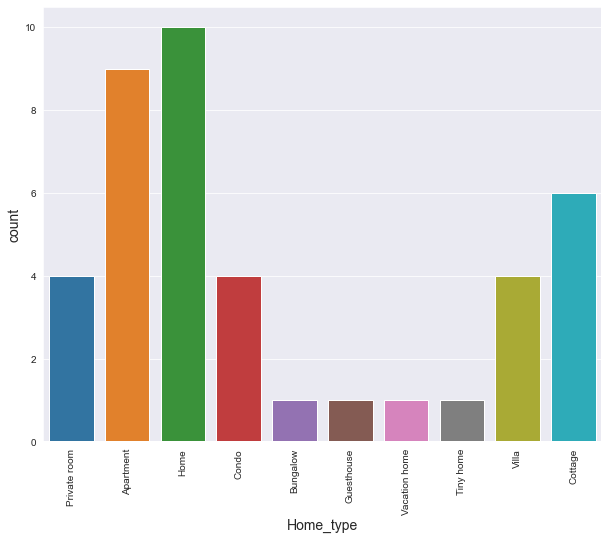

In [39]:
# Plot countplot Home_type in this particular areas
plt.figure(figsize=(10,8))
sns.countplot(x='Home_type', data=sorted_df)
plt.xlabel('Home_type', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(rotation=90)
plt.show()

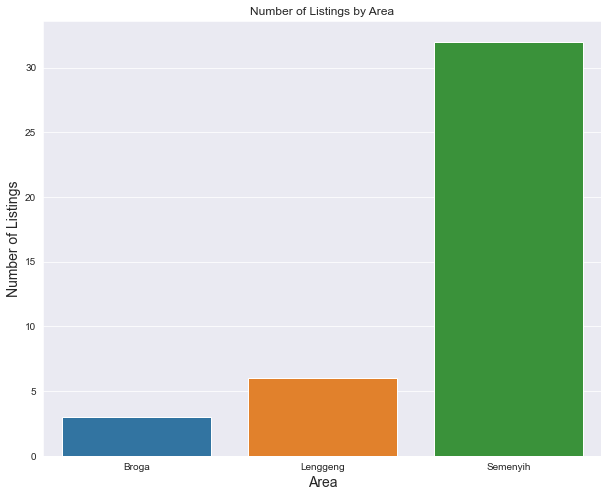

In [40]:
# Group the dataframe by 'Area' and get the count of listings in each area
listings_by_area = sorted_df.groupby(['Area'])['Home_type'].count().reset_index()

# Plot the bar graph 
plt.figure(figsize=(10,8))
sns.barplot(x='Area', y='Home_type', data=listings_by_area)
plt.title('Number of Listings by Area')
plt.xlabel('Area',fontsize=14)
plt.ylabel('Number of Listings',fontsize=14)
plt.show()

In [41]:
# Show the number of different home_types for each particular area
grouped_df = sorted_df.groupby(['Area', 'Home_type']).size().reset_index(name='counts')
grouped_df


,Area,Home_type,counts
0,Broga,Cottage,3
1,Lenggeng,Bungalow,1
2,Lenggeng,Cottage,3
3,Lenggeng,Private room,1
4,Lenggeng,Tiny home,1
5,Semenyih,Apartment,9
6,Semenyih,Condo,4
7,Semenyih,Guesthouse,1
8,Semenyih,Home,10
9,Semenyih,Private room,3


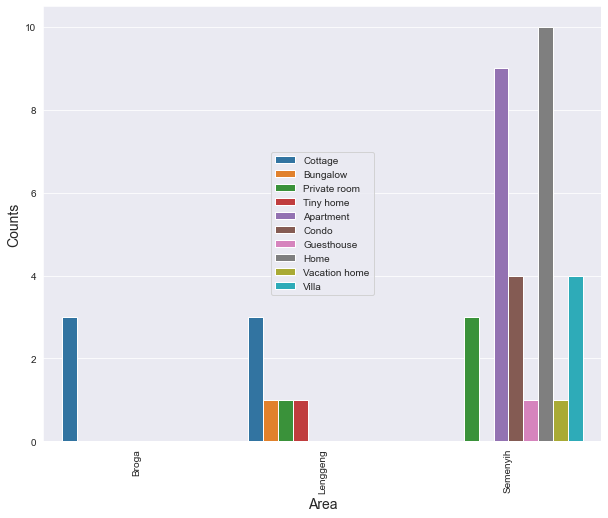

In [42]:
# Plot the bar graph
plt.figure(figsize=(10,8))
sns.barplot(x='Area', y='counts', hue='Home_type', data=grouped_df)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=90)
plt.legend(loc='center')
plt.show()